# Vương Thanh Linh
# MSSV: 21521082

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [18]:
train = pd.read_csv('adult.data.csv')
test = pd.read_csv('adult.test.csv')

## 2. Tiền xử lý dữ liệu

In [19]:
train.replace(" ?", np.nan, inplace=True)
test.replace(" ?", np.nan, inplace=True)
train = train.dropna()
test = test.dropna()
train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 15 columns]

In [20]:
train.drop('fnlwgt', axis=1, inplace=True)
train

age          workclass    education  education-num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[30162 rows x 14 columns]

In [21]:
data = pd.concat([train, test], axis=0)
data

age          workclass   education  education-num       marital-status  \
0       39          State-gov   Bachelors             13        Never-married   
1       50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2       38            Private     HS-grad              9             Divorced   
3       53            Private        11th              7   Married-civ-spouse   
4       28            Private   Bachelors             13   Married-civ-spouse   
...    ...                ...         ...            ...                  ...   
16275   33            Private   Bachelors             13        Never-married   
16276   39            Private   Bachelors             13             Divorced   
16278   38            Private   Bachelors             13   Married-civ-spouse   
16279   44            Private   Bachelors             13             Divorced   
16280   35       Self-emp-inc   Bachelors             13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
16275      Prof-specialty       Own-child                White     Male   
16276      Prof-specialty   Not-in-family                White   Female   
16278      Prof-specialty         Husband                White     Male   
16279        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
16280     Exec-managerial         Husband                White     Male   

       capital-gain  capital-loss  hours-per-week  native-country  income  
0              2174             0              40   United-States   <=50K  
1                 0             0              13   United-States   <=50K  
2                 0             0              40   United-States   <=50K  
3                 0             0              40   United-States   <=50K  
4                 0             0              40            Cuba   <=50K  
...             ...           ...             ...             ...     ...  
16275             0             0              40   United-States   <=50K  
16276             0             0              36   United-States   <=50K  
16278             0             0              50   United-States   <=50K  
16279          5455             0              40   United-States   <=50K  
16280             0             0              60   United-States    >50K  

[45222 rows x 14 columns]

## 3. Khảo sát độ tương đồng

<Axes: >

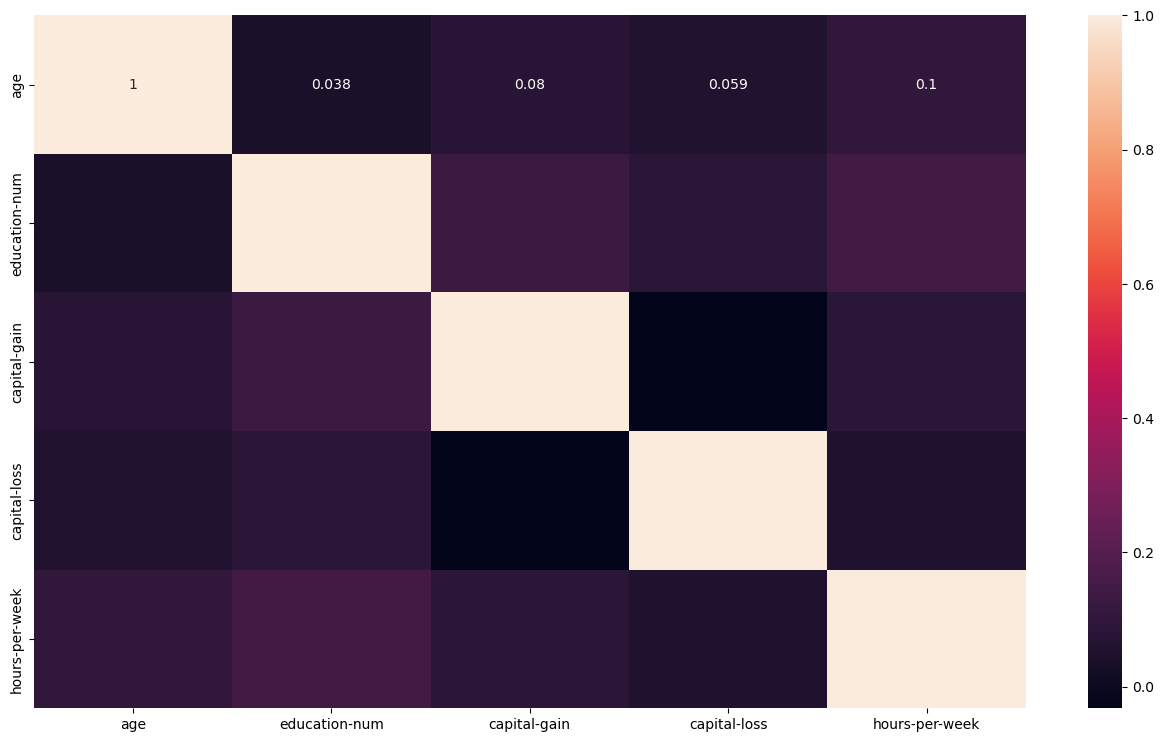

In [22]:
data2 = data.select_dtypes(include=['int64'])

plt.figure(figsize=(16,9))
sns.heatmap(data2.corr(method='pearson'), annot=True)

## 4. Tách cột dữ liệu

In [23]:
features = data.drop('income', axis=1)
labels = data['income']

## 5. Chuyển đổi thành One-hot Encoder

In [25]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [27]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
16275   33             13             0             0              40   
16276   39             13             0             0              36   
16278   38             13             0             0              50   
16279   44             13          5455             0              40   
16280   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       False                 False               False   
1                       False                 False               False   
2                       False                 False                True   
3                       False                 False                True   
4                       False                 False                True   
...                       ...                   ...                 ...   
16275                   False                 False                True   
16276                   False                 False                True   
16278                   False                 False                True   
16279                   False                 False                True   
16280                   False                 False               False   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        False                        False  ...   
1                        False                         True  ...   
2                        False                        False  ...   
3                        False                        False  ...   
4                        False                        False  ...   
...                        ...                          ...  ...   
16275                    False                        False  ...   
16276                    False                        False  ...   
16278                    False                        False  ...   
16279                    False                        False  ...   
16280                     True                        False  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   
...                         ...                          ...   
16275                     False                        False   
16276                     False                        False   
16278                     False                        False   
16279                     False                        False   
16280                     False                        False   

       native-country_ Scotland  native-country_ South  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
16275                     False                  False   
16276                     False                  False   
16278                     False                  False   
16279                     False                  False   
16280

## 6. Tách thành tập train và test

In [29]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

## 7. Xây dựng ID3 

In [30]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Accuracy:  0.8175298804780876
Report:                precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.8175298804780876')

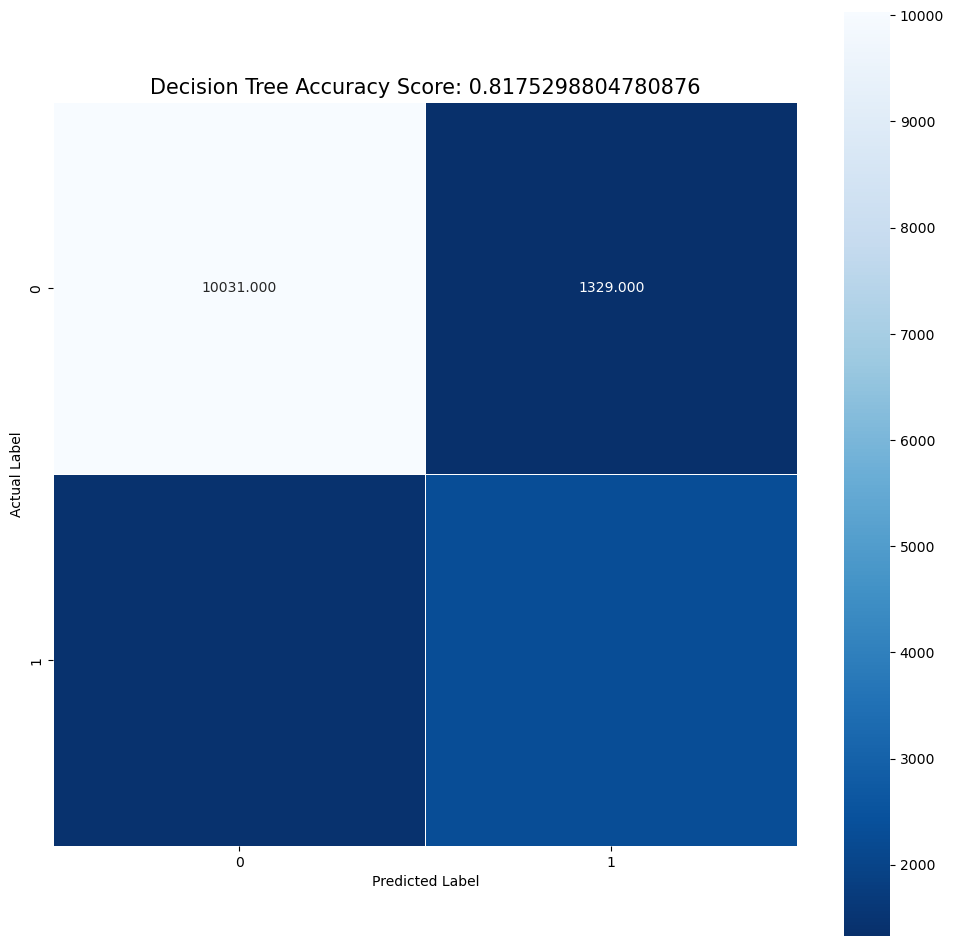

In [32]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r");
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

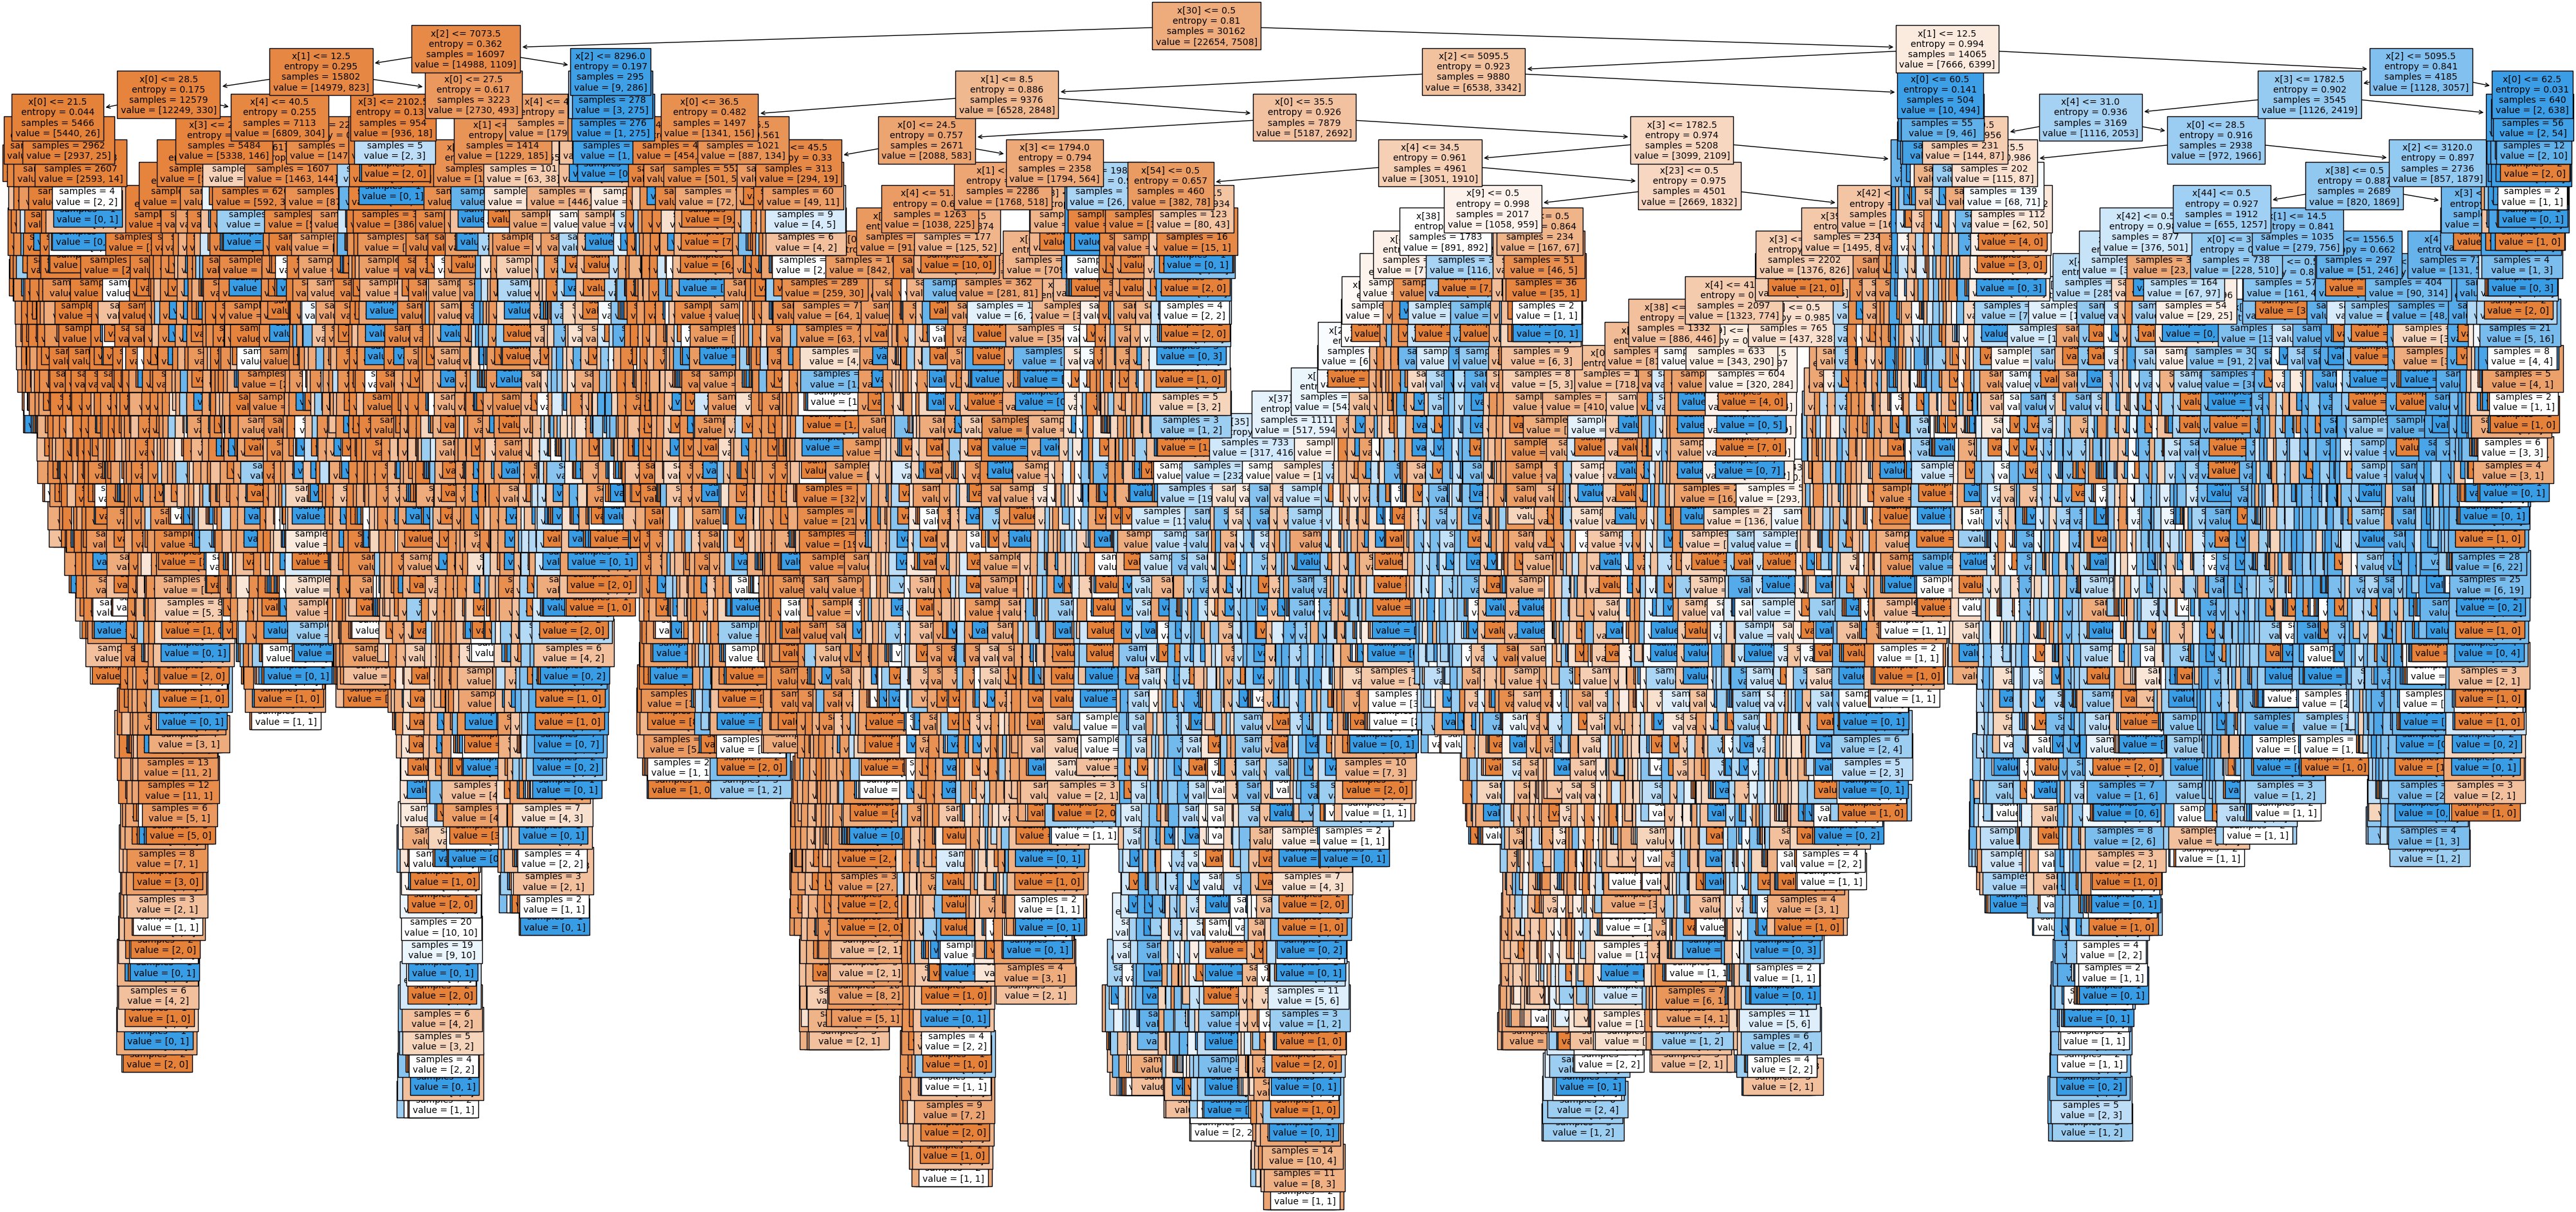

In [33]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('Decision_tree', dpi=100)
plt.show()

## 8. Thực hiện tương tự dùng Gini index

Accuracy:  0.8122841965471448
Report:                precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



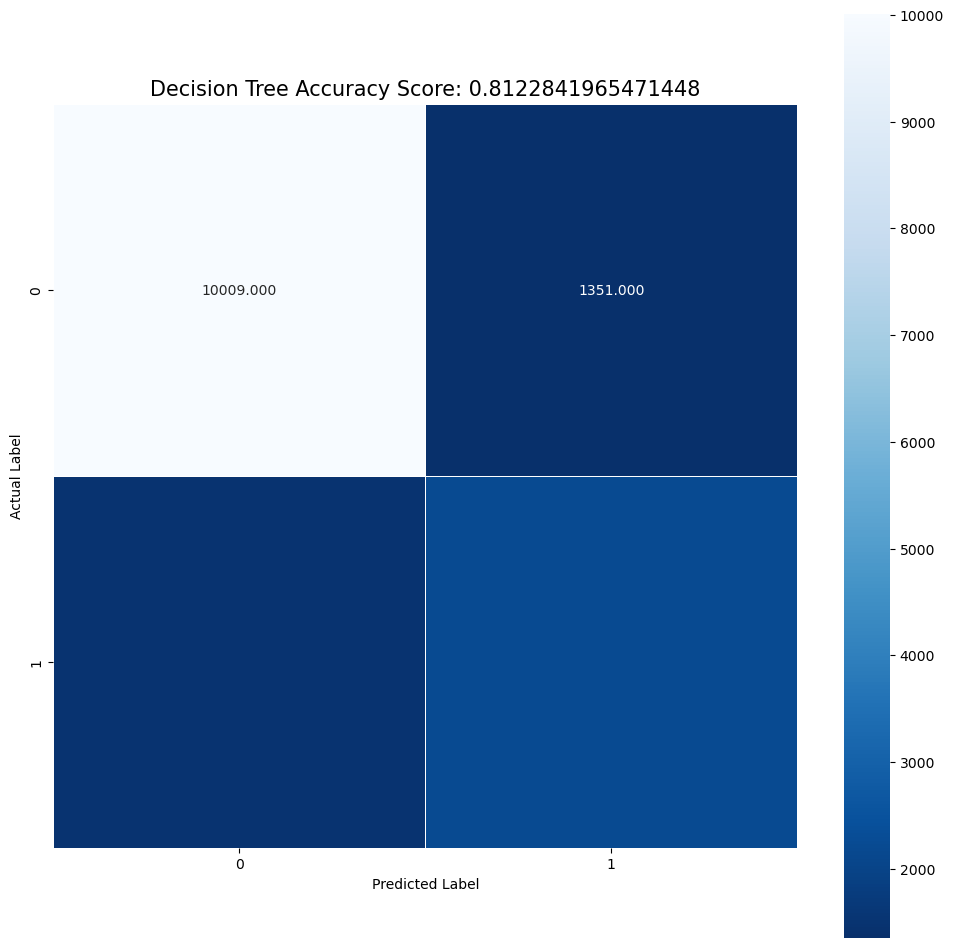

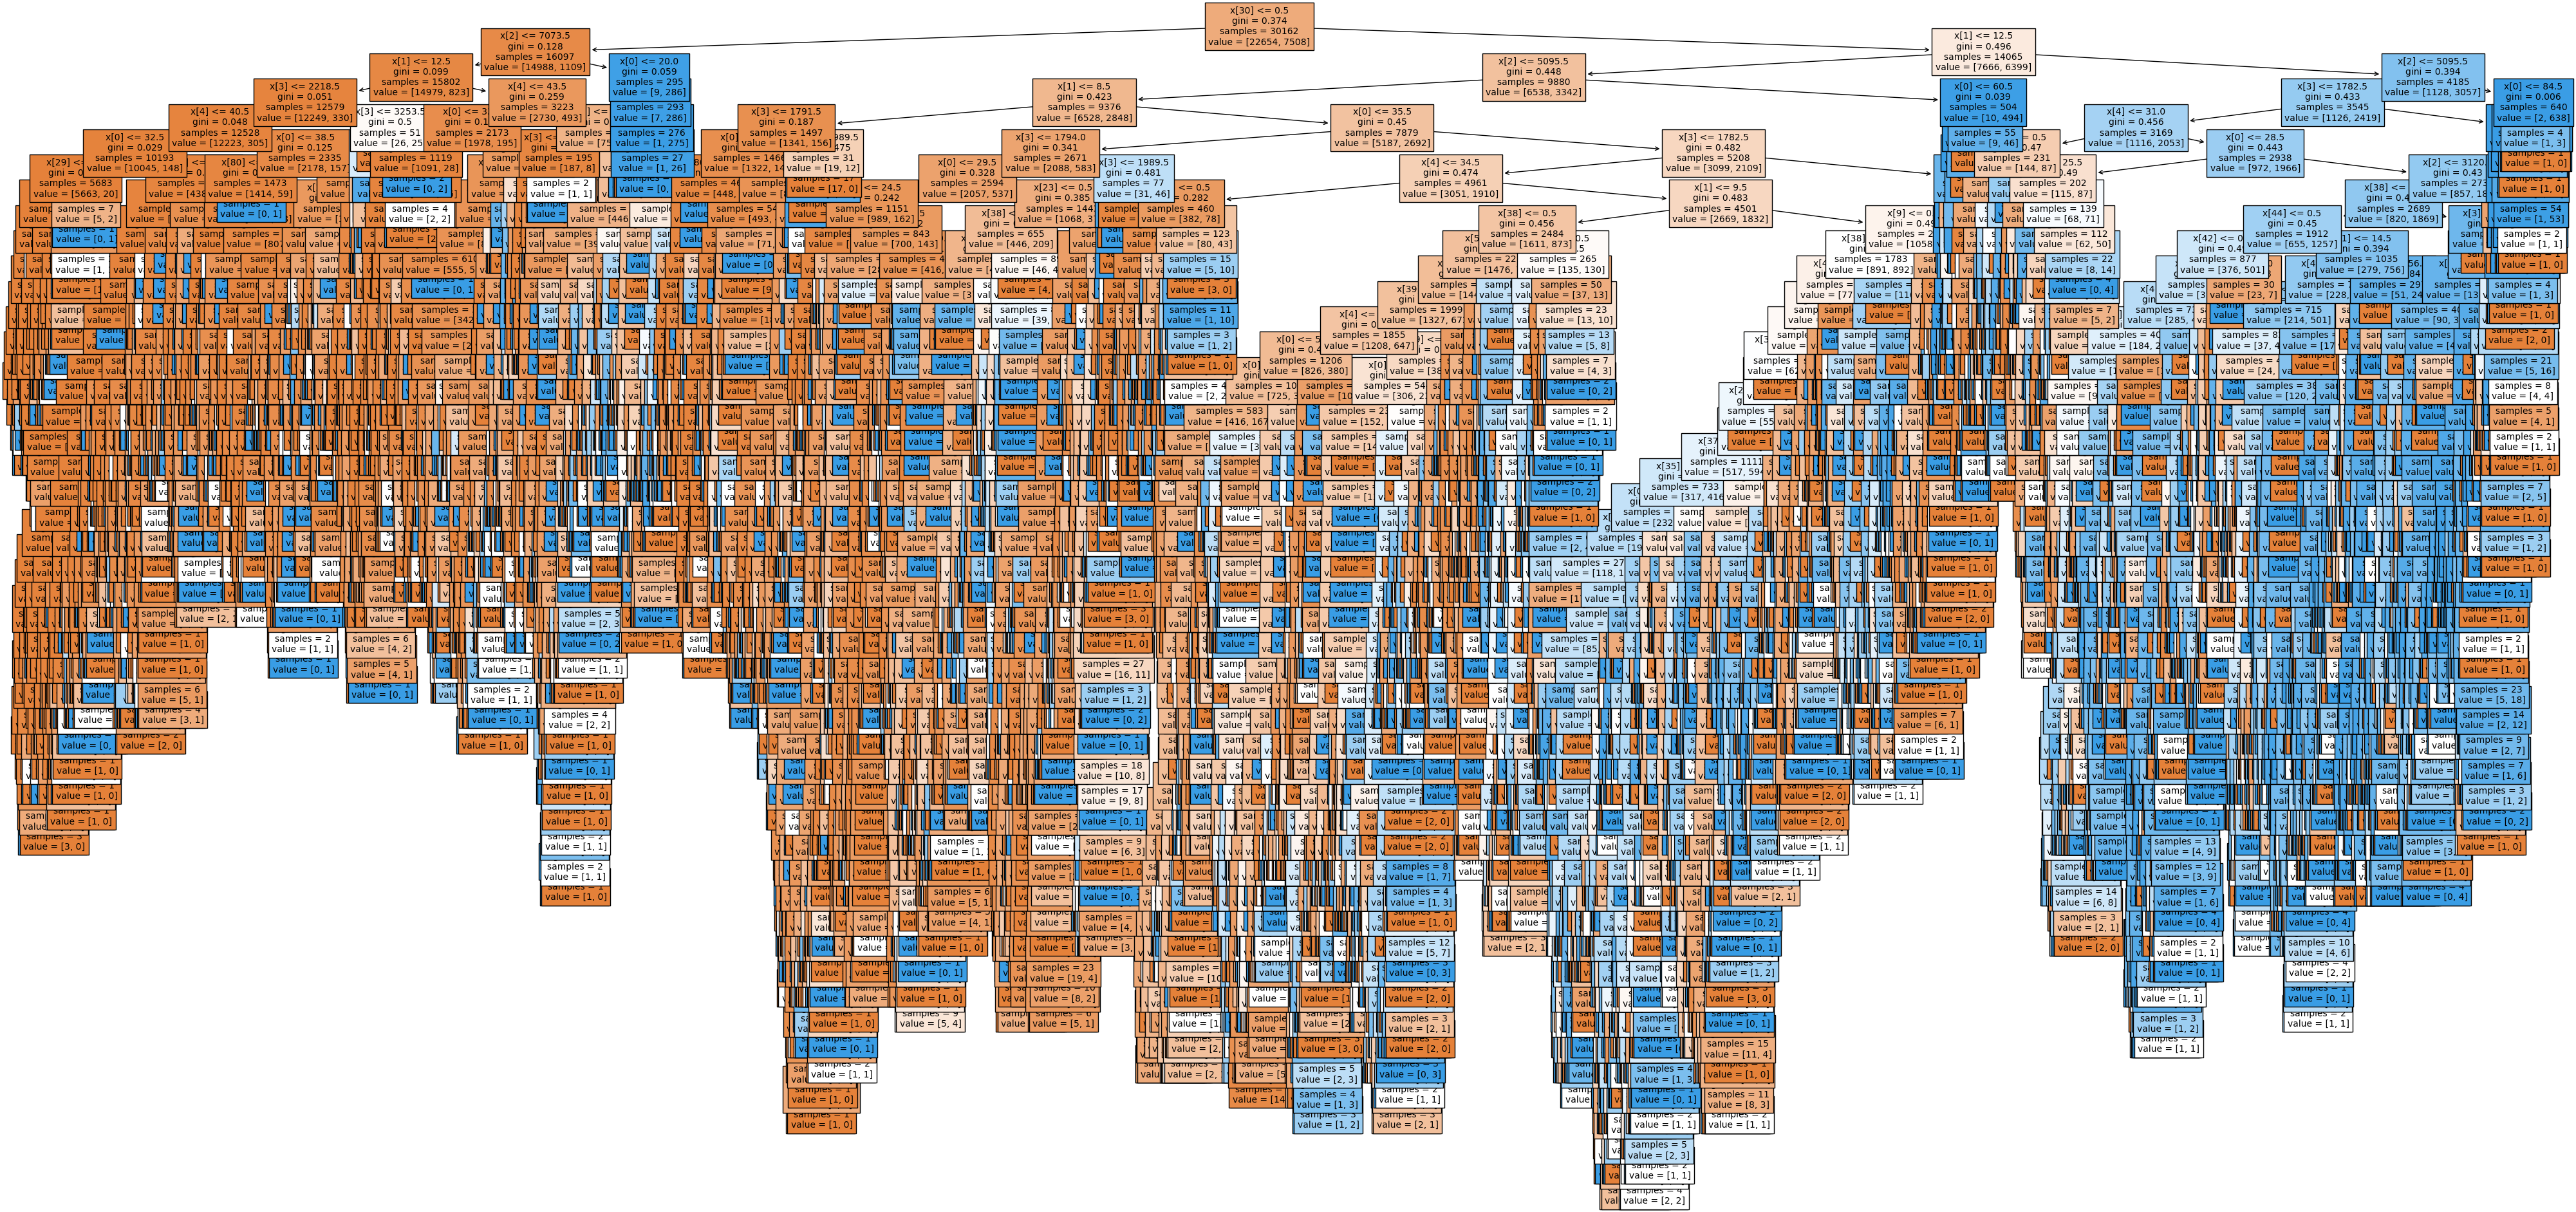

In [35]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_gini.fit(X_train, y_train)

tree_pred_gini = clf_gini.predict(X_test)
tree_score_gini = metrics.accuracy_score(y_test, tree_pred_gini)
print("Accuracy: ", tree_score_gini)
print("Report: ", metrics.classification_report(y_test, tree_pred_gini))

tree_cm_gini = metrics.confusion_matrix(y_test, tree_pred_gini)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm_gini, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r");
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score_gini)
plt.title(title, size = 15)

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_gini, filled=True, fontsize=10)
plt.savefig('Decision_tree_gini', dpi=100)
plt.show()

## 9. Xây dựng mô hình sử dụng Naive Bayes

Accuracy:  0.8029216467463479
Report:                precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8029216467463479')

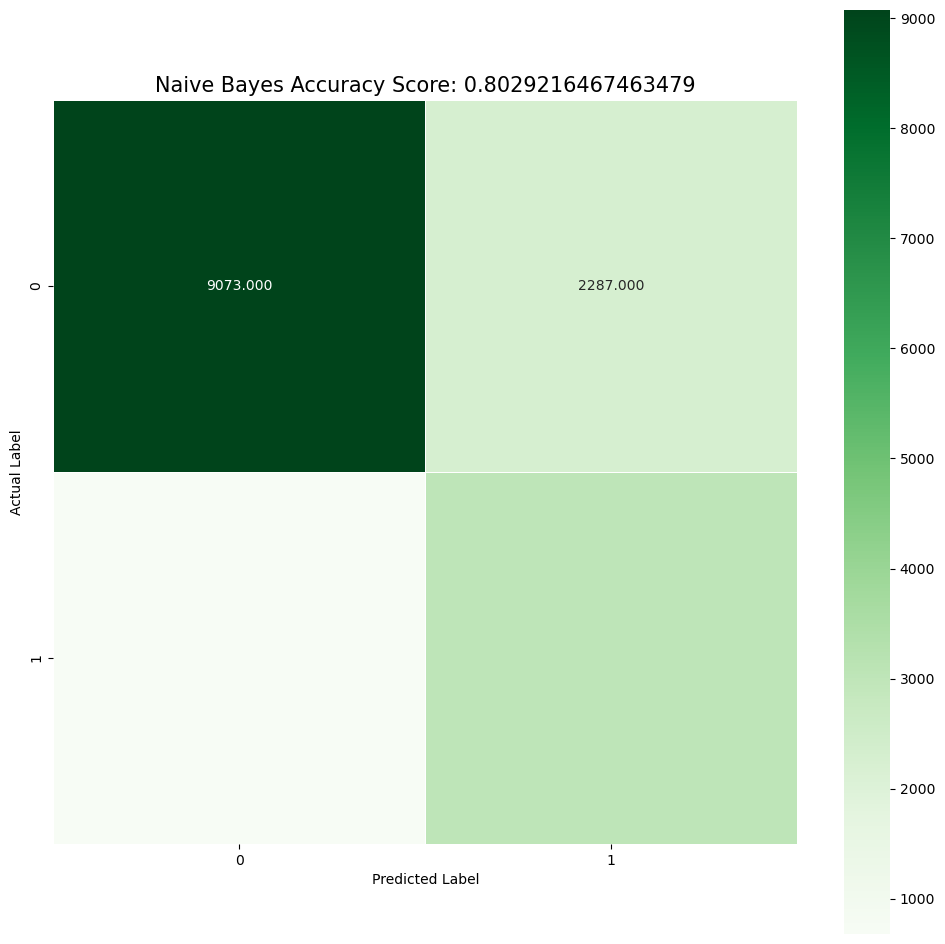

In [36]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Naive Bayes Accuracy Score: {0}'.format(bayes_score),size = 15)

## 10. Nhận xét

- *Độ chính xác*: ID3 có độ chính xác cao nhất (0.8175), theo sau lần lượt là CART (0.8123) và Naive Bayes (0.8029)
- *f1-score*: đối với lớp '<= 50K' ID3 và CART cao hơn so với Naive Bayes (0.88 > 0.86). Đối với lớp '> 50K' Naive Bayes thực hiện tốt hơn (0.67) ID3 (0.62) và CART (0.61)